<a href="https://colab.research.google.com/github/nandaglhp/MachineLearning_Quiz2/blob/main/05_AnandaGP_Quiz2_OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri Mahasiswa

Nama: Ananda Galih Pratiwi

Kelas: TI-3F

Absen: 05

NIM: 2141720045

# Import Library

Tahap ini melibatkan impor semua pustaka dan modul yang diperlukan untuk pengembangan dan pelatihan model CNN. Pustaka ini digunakan untuk berbagai tujuan seperti pemrosesan gambar, pembuatan model, evaluasi, dan visualisasi, dll.

In [ ]:
import tensorflow as tf  # Mengimpor library TensorFlow untuk machine learning.
import numpy as np  # Mengimpor library NumPy untuk operasi numerik.
import pandas as pd  # Mengimpor library Pandas untuk manipulasi data.
import matplotlib.pyplot as plt  # Mengimpor library Matplotlib untuk visualisasi data.
import seaborn as sns  # Mengimpor library Seaborn untuk visualisasi data statistik.
from sklearn.preprocessing import LabelBinarizer  # Mengimpor LabelBinarizer untuk encoding variabel target.
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import classification_report  # Mengimpor classification_report untuk mengevaluasi klasifikasi model.
import zipfile  # Mengimpor library zipfile untuk bekerja dengan file zip.

# Load Dataset

## Load MNIST

Proses load dataset MNIST akan melibatkan penggunaan pustaka atau fungsi yang tersedia dalam pustaka seperti Keras atau TensorFlow untuk mengambil dataset dari sumbernya dan memuatnya ke dalam lingkungan pengembangan seperti Google Colab.

In [ ]:
# Mengimpor dataset MNIST dari library TensorFlow Keras
from tensorflow.keras.datasets import mnist

In [ ]:
# Memuat data latih dan data uji dari dataset MNIST ke dalam variabel
# Variabel train_data dan train_labels berisi data gambar dan label-labelnya untuk data latih
# Variabel test_data dan test_labels berisi data gambar dan label-labelnya untuk data uji
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [ ]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [ ]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

Pada dataset MNIST, terdapat dua set data: data latih (train) dan data uji (test). Kedua set data ini biasanya digunakan terpisah untuk keperluan latihan dan pengujian model.

Namun, dalam beberapa kasus, ada kebutuhan untuk menggabungkan kedua set data menjadi satu dataset tunggal. Ini bisa dilakukan dengan tujuan tertentu, seperti untuk menggabungkan data latih dan data uji menjadi satu dataset yang lebih besar untuk pelatihan model yang lebih baik.

In [ ]:
# Menggabungkan data latih dan data uji dari dataset MNIST ke dalam satu array menggunakan np.vstack
# Variabel digits_data akan berisi gabungan dari data gambar dari train_data dan test_data
digits_data = np.vstack([train_data, test_data])
# Menggabungkan label-label dari data latih dan data uji dari dataset MNIST ke dalam satu array menggunakan np.hstack
# Variabel digits_labels akan berisi gabungan dari label-label dari train_labels dan test_labels
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [ ]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 1')

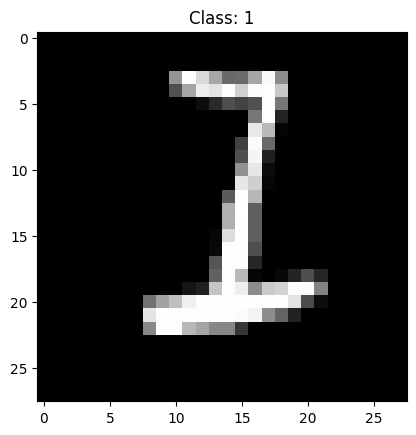

In [ ]:
# Randomly checking the data
# Menghasilkan indeks acak antara 0 dan jumlah total gambar dalam dataset `digits_data`
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan gambar dengan indeks yang dihasilkan secara acak menggunakan plt.imshow()
# cmap='gray' digunakan untuk menampilkan gambar dalam skala abu-abu karena dataset MNIST adalah gambar grayscale
plt.imshow(digits_data[idx], cmap='gray')
# Menampilkan judul plot yang berisi kelas atau label dari gambar yang dipilih secara acak
# Menggunakan str() untuk mengonversi label ke dalam string sebelum menambahkannya ke judul plot
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

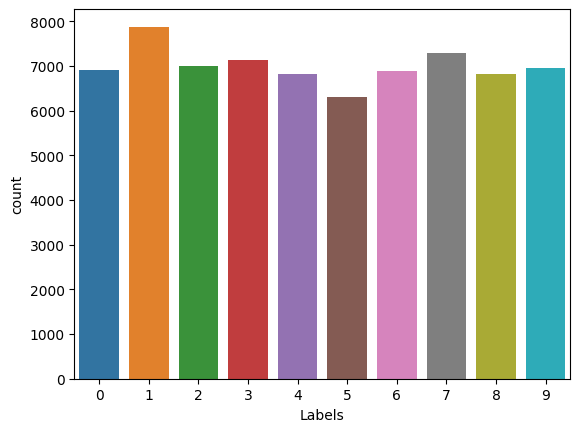

In [ ]:
# Check data distribution
# Membuat DataFrame dari label-label (digits_labels) dengan satu kolom bernama 'Labels'
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# Menggunakan Seaborn untuk membuat plot distribusi label menggunakan countplot
# x='Labels' menunjukkan bahwa sumbu x akan berisi data dari kolom 'Labels' pada DataFrame
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

Dataset A-Z Handwritten Data adalah dataset yang berisi gambar tulisan tangan dari huruf A sampai Z. Setiap gambar menunjukkan satu huruf. Dataset ini dapat ditemukan di platform seperti Kaggle dan dapat digunakan untuk tugas-tugas pengenalan karakter atau OCR.

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-04 11:38:49--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   268MB/s    in 0.7s    

2023-12-04 11:38:50 (268 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
# Membuka file zip dengan mode 'read' (mode='r')
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
# Mengekstrak seluruh isi dari file zip ke dalam direktori saat ini (./)
zip_object.extractall('./')
# Menutup file zip setelah selesai diekstrak
zip_object.close()

In [ ]:
# Menghubungkan Google Drive (pada lingkungan Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca file CSV 'A_Z Handwritten Data.csv' dan menyimpannya ke dalam sebuah DataFrame dengan nama dataset_az
# Kemudian, mengonversi tipe data di dalam DataFrame tersebut menjadi float32
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan DataFrame dataset_az yang telah dibaca dan dikonversi tipenya
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

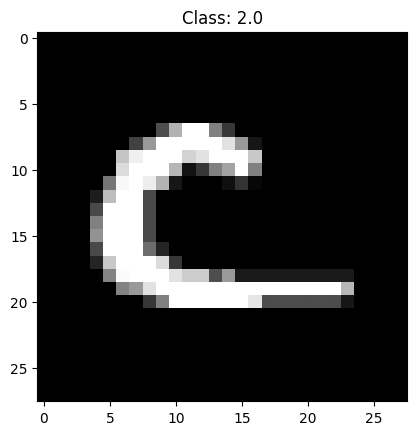

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

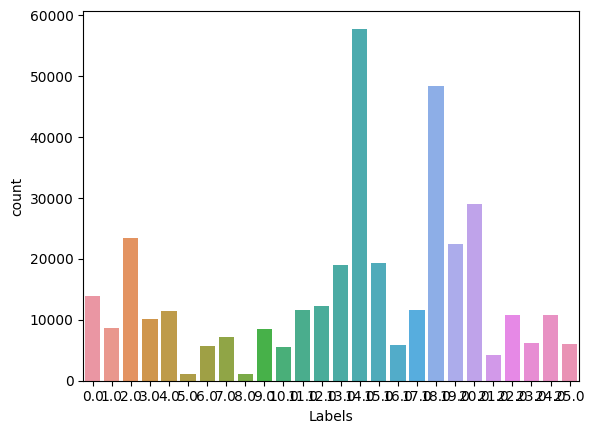

In [ ]:
# Check data distribution
# Membuat DataFrame dari label-label (alphabet_labels) dengan satu kolom bernama 'Labels'
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# Menggunakan Seaborn untuk membuat plot distribusi label menggunakan countplot
# x='Labels' menunjukkan bahwa sumbu x akan berisi data dari kolom 'Labels' pada DataFrame
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

Langkah ini melibatkan penggabungan dataset MNIST (digit tulisan tangan) dan dataset Kaggle A-Z (huruf tulisan tangan) menjadi satu dataset yang lebih besar dan beragam. Tujuannya adalah untuk melatih model yang lebih kuat dan beragam dengan menyatukan informasi dari dua dataset yang berbeda.

In [ ]:
# Check unique value from digits_labels (cek nilai unik dari digits_labels)
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels (cek nilai unik dari alphabet_labels)
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10 # Menambahkan 10 ke setiap label pada alphabet_labels
# untuk melanjutkan dari 10 ke atas (untuk A-Z)

In [ ]:
# cek kembali nilai unik dari alphabet_labels
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Menggabungkan kedua dataset (alphabet_data dan digits_data)
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Cek bentuk dari data yang telah digabungkan
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Cek nilai-nilai yang unik dari labels yang baru digabungkan
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Mengonversi data menjadi float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# Cek bentuk dari data setelah ditambah dimensi kedalaman
data.shape

(442450, 28, 28, 1)

# Preprocessing

Langkah ini termasuk berbagai teknik untuk mempersiapkan data sebelum dimasukkan ke dalam model.

In [ ]:
# Normalisasi data
# Membagi setiap nilai dalam variabel data dengan 255.0.
data /= 255.0

In [ ]:
# Check range value of data
# mengecek rentang nilai dari elemen-elemen pada indeks pertama dari variabel 'data'.
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
# menggunakan LabelBinarizer untuk mengkodekan label-label dalam variabel 'labels'
# menjadi bentuk biner. LabelBinarizer digunakan untuk mengubah label kategori menjadi representasi biner.
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Check labels shape
# menampilkan bentuk (shape) dari variabel 'labels' setelah dilakukan proses
# transformasi dengan LabelBinarizer.
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

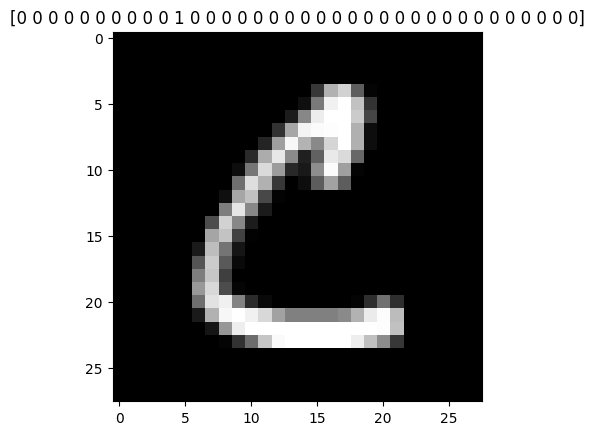

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))
# menampilkan gambar dari data pada indeks ke-30000 (asumsi data berbentuk
# gambar dengan dimensi 28x28) beserta label biner yang sesuai.

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

# menghitung jumlah data untuk setiap label pertama dengan menjumlahkan
# nilai-nilai pada setiap kolom dari variabel 'labels'.

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()
# menampilkan nilai maksimum dari jumlah data pada satu label tertentu.

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]
# membuat bobot untuk setiap data dengan mengiterasi setiap label dan menghitung
# bobotnya berdasarkan perbandingan jumlah data terbanyak dengan jumlah data pada setiap label.

# Check the weight for each data
classes_weights
# menampilkan bobot yang telah dihitung untuk setiap data.

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Penjelasan

Proses normalisasi data ini bertujuan untuk mengubah rentang nilai setiap fitur data menjadi kisaran antara 0 hingga 1. Dengan melakukan normalisasi ini, perbedaan skala nilai antar fitur bisa disamakan, mempermudah model dalam mempelajari pola-pola yang ada dalam dataset. Misalnya, jika dataset berisi gambar, normalisasi akan mengubah intensitas piksel dari rentang 0 hingga 255 menjadi rentang 0 hingga 1, yang umumnya diperlukan dalam proses pelatihan model.

Proses encoding label menggunakan Label Binarizer memiliki tujuan untuk mengonversi label kategori menjadi representasi biner. Hasil dari encoding ini akan memberikan representasi biner untuk setiap label yang ada dalam dataset. Representasi ini biasanya berbentuk matriks dengan jumlah baris yang sama dengan jumlah sampel data dan jumlah kolom yang sesuai dengan jumlah kelas atau label yang ada dalam dataset. Sebagai contoh, jika terdapat 3 kelas label, hasil encoding akan membentuk matriks dengan 3 kolom, masing-masing mewakili salah satu label dengan nilai biner 0 atau 1.

Tampilan gambar yang ditampilkan merupakan representasi visual dari data. Gambar yang ditampilkan adalah gambar dari dataset yang memiliki label biner tertentu. Misalnya, menampilkan gambar yang sesuai dengan label biner [0, 1, 0] dari dataset, kita akan melihat visualisasi gambar yang sesuai dengan label biner tersebut.

Bobot yang diberikan untuk setiap label bertujuan untuk menangani ketidakseimbangan dalam dataset. Bobot ini memberikan penekanan lebih pada data yang jumlahnya lebih sedikit. Dengan memberikan bobot ini, model machine learning cenderung lebih memperhatikan data yang kurang representatif agar dapat mempelajari pola yang ada secara lebih baik.

Jadi, hasil dari proses preprocessing ini meliputi normalisasi data guna menyamakan skala nilai, encoding label dengan menggunakan Label Binarizer untuk mendapatkan representasi biner, serta penggunaan bobot untuk menangani ketidakseimbangan data yang memungkinkan model untuk belajar dari data yang kurang representatif.

# Split Data to Train and Test

> Indented block



Dataset yang telah dimuat dibagi menjadi data latih (train) dan data uji (test). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji kinerja model yang telah dilatih.

In [ ]:
# Split Data to Train and Test
# Memisahkan data menjadi data latih dan data uji
# `train_test_split` akan membagi data dan labelnya menjadi data latih (train) dan data uji (test)
# test_size = 0.2 menandakan proporsi data yang dialokasikan untuk data uji sebesar 20%
# random_state = 1 digunakan untuk menghasilkan pembagian yang sama jika kode ini dijalankan lebih dari satu kali
# stratify = labels bertujuan untuk memastikan proporsi kelas yang sama di antara data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

## Create Data Augmentation

In [ ]:
# Import library
# Mengimpor library yang dibutuhkan untuk augmentasi data menggunakan ImageDataGenerator dari TensorFlow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator akan menghasilkan variasi data baru dari data yang ada dengan menerapkan transformasi tertentu
# Berbagai parameter seperti rotasi, zoom, pergeseran, dan flip horizontal bisa diterapkan pada gambar
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Import library

# Import library yang diperlukan dari TensorFlow untuk membangun model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
# Membangun arsitektur jaringan neural

network = Sequential()  # Membuat model sequential dari Keras

# Menambahkan lapisan konvolusi pertama dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input berukuran (28,28,1)
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi kedua dengan 64 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'same'
network.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi ketiga dengan 128 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan padding 'valid'
network.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))

# Menambahkan lapisan max pooling dengan ukuran pool 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Meratakan data ke dalam vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU
network.add(Dense(64, activation='relu'))

# Menambahkan lapisan dense (fully connected) dengan 128 neuron dan fungsi aktivasi ReLU
network.add(Dense(128, activation='relu'))

# Menambahkan lapisan output dengan 36 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan categorical crossentropy sebagai fungsi loss, adam sebagai optimizer, dan mengukur akurasi sebagai metrik
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# melihat ringkasan atau struktur dari model jaringan
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Membuat label aktual
name_labels = '0123456789'  # Mendefinisikan label dari angka 0 hingga 9

# Menambahkan huruf besar dalam alfabet A-Z ke dalam variabel name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Mengonversi string menjadi list karakter dan menyimpannya di variabel name_labels
name_labels = [l for l in name_labels]

# Menampilkan label aktual yang telah dibuat
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'  # Nama file untuk menyimpan model
epochs = 20  # Jumlah iterasi melalui seluruh dataset yang akan dilakukan saat pelatihan
batch_size = 128  # Jumlah sampel yang akan digunakan dalam satu iterasi

In [ ]:
# Setup checkpoint
# Mengatur callback ModelCheckpoint untuk menyimpan model dengan performa terbaik selama pelatihan
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [49]:
# Fit the model
history = network.fit(
    augmentation.flow(X_train, y_train, batch_size=batch_size),  # Data augmentasi sebagai generator untuk data latih
    validation_data=(X_test, y_test),  # Data validasi yang digunakan untuk mengevaluasi performa model
    steps_per_epoch=len(X_train) // batch_size,  # Jumlah langkah per epoch yang dilakukan dalam setiap iterasi pelatihan
    epochs=epochs,  # Jumlah iterasi melalui seluruh dataset
    class_weight=classes_weights,  # Menentukan bobot kelas untuk menangani ketidakseimbangan data
    verbose=1,  # Level detail output saat pelatihan
    callbacks=[checkpointer]  # Daftar callback yang akan digunakan saat pelatihan
)

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1620 - accuracy: 0.8283
Epoch 1: val_loss improved from inf to 0.20115, saving model to custom_ocr.model
2765/2765 [==============================] - 147s 49ms/step - loss: 2.1620 - accuracy: 0.8283 - val_loss: 0.2011 - val_accuracy: 0.9330
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9719 - accuracy: 0.9039
Epoch 2: val_loss did not improve from 0.20115
2765/2765 [==============================] - 148s 53ms/step - loss: 0.9719 - accuracy: 0.9039 - val_loss: 0.2145 - val_accuracy: 0.9117
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8122 - accuracy: 0.9149
Epoch 3: val_loss improved from 0.20115 to 0.18757, saving model to custom_ocr.model
2765/2765 [==============================] - 138s 50ms/step - loss: 0.8122 - accuracy: 0.9149 - val_loss: 0.1876 - val_accuracy: 0.9240
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7145 - accu

# Penjelasan

Hasil dari proses ini adalah pelatihan model jaringan saraf menggunakan teknik augmentasi data pada dataset pelatihan. Augmentasi data memungkinkan dataset asli diperluas dengan variasi tambahan, seperti rotasi, pergeseran, dan perbesaran gambar, yang diterapkan secara dinamis saat proses pelatihan. Data latih akan mengalir melalui langkah-langkah (batches) yang dibentuk oleh aliran data augmentasi.

Selama proses pelatihan, model akan diperbarui secara berulang melalui jumlah epoch yang telah ditentukan. Setiap epoch merupakan satu iterasi melalui keseluruhan dataset latih. Dengan penggunaan bobot kelas, model diberi kesadaran lebih terhadap kelas-kelas yang jumlahnya lebih sedikit dalam dataset. Hal ini membantu model untuk lebih fokus dan memperoleh pemahaman yang lebih baik terhadap kelas-kelas yang kurang representatif.

Hasil akhir dari pelatihan ini dapat diamati melalui objek history yang terbentuk. Objek ini berisi metrik yang diukur, seperti akurasi atau kehilangan (loss), yang terakumulasi selama proses pelatihan model. Melalui analisis dari objek history, kita dapat mengevaluasi performa dan tingkat pembelajaran model pada setiap iterasi (epoch) pelatihan.

Secara keseluruhan, hasil yang diperoleh adalah melatih model jaringan saraf dengan memanfaatkan teknik augmentasi data untuk memperluas variasi dataset, penerapan bobot kelas untuk penekanan pada kelas-kelas minor, serta pemantauan dan evaluasi pelatihan model menggunakan callback yang mengamati performa selama proses pelatihan.

# Evaluate Model

## Make a Single Prediction

In [50]:
# make a prediction
# Melakukan prediksi menggunakan model neural network terhadap data uji (X_test)
# network.predict() digunakan untuk membuat prediksi
# batch_size=batch_size menunjukkan ukuran batch yang digunakan saat melakukan prediksi
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [51]:
# Menampilkan prediksi dari model untuk data dengan indeks ke-1 dari data uji (X_test)
# predictions[1] digunakan untuk mengakses prediksi untuk data dengan indeks ke-1
# Ini akan menampilkan probabilitas untuk setiap label
predictions[1]

array([4.6095754e-20, 1.2422656e-12, 2.2996793e-13, 7.0233637e-16,
       3.0283227e-18, 5.0425235e-13, 6.4957858e-27, 4.0582589e-15,
       3.5616817e-14, 7.1376562e-19, 3.6638886e-13, 1.4637709e-13,
       7.6462309e-12, 6.9142699e-11, 5.8068580e-12, 3.7804346e-11,
       1.8588926e-15, 2.7592834e-13, 9.9999726e-01, 2.6993562e-06,
       5.8605390e-14, 2.6802132e-11, 3.1313470e-19, 5.3589389e-14,
       1.3749376e-11, 5.6778383e-13, 3.7913612e-18, 1.0274365e-14,
       1.2174001e-11, 1.5733212e-08, 1.2953083e-14, 1.0785519e-16,
       1.7196101e-20, 4.8053944e-12, 1.5221099e-13, 2.8086665e-12],
      dtype=float32)

In [52]:
# Menggunakan np.argmax() untuk mendapatkan label dengan nilai probabilitas tertinggi dari prediksi pada data dengan indeks ke-1 dari X_test
np.argmax(predictions[1])

18

In [53]:
# Check label for 24
name_labels[18]

'I'

In [54]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# Mencari indeks nilai tertinggi dari vektor label y_test pada indeks ke-1
np.argmax(y_test[1])

18

In [56]:
# Mencari label dari nilai tertinggi dalam vektor label y_test pada indeks ke-18
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [57]:
# Mengevaluasi model neural network menggunakan data uji (X_test dan y_test)
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 4ms/step - loss: 0.1730 - accuracy: 0.9347


[0.1729571372270584, 0.9347158074378967]

In [58]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.27      0.79      0.41      1381
           1       0.97      0.99      0.98      1575
           2       0.92      0.97      0.94      1398
           3       0.95      0.99      0.97      1428
           4       0.92      0.96      0.94      1365
           5       0.58      0.95      0.72      1263
           6       0.97      0.94      0.96      1375
           7       0.96      0.99      0.98      1459
           8       0.97      0.98      0.98      1365
           9       0.98      0.99      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.96      0.99      0.97      1734
           C       0.99      0.99      0.99      4682
           D       0.84      0.98      0.90      2027
           E       0.99      0.99      0.99      2288
           F       0.96      1.00      0.98       233
           G       0.91      0.97      0.94      1152
           H       0.96    

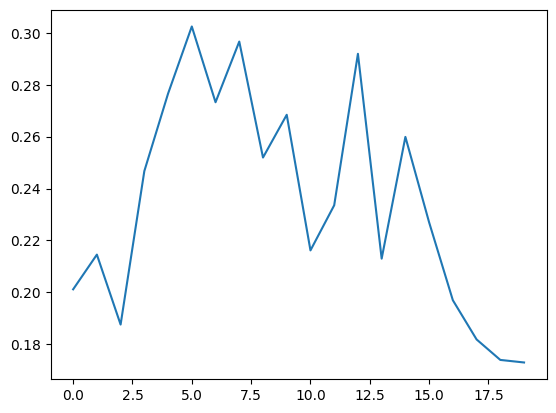

In [59]:
# Menggunakan matplotlib untuk membuat plot nilai loss pada set data validasi
# ('val_loss') untuk setiap epoch
plt.plot(history.history['val_loss'])

In [60]:
# Melihat kunci-kunci (keys) yang tersedia dalam variabel history.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

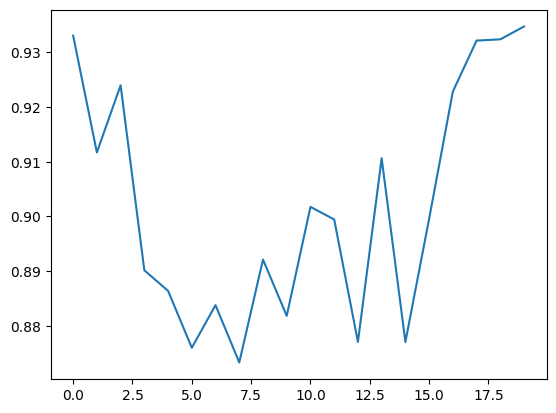

In [61]:
# Memvisualisasikan metrik 'val_accuracy' (akurasi pada set data validasi) dari
# hasil pelatihan model
plt.plot(history.history['val_accuracy'])



# Save The Model

In [62]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# Menyimpan model yang telah dilatih dalam format h5 dengan nama 'network'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [63]:
# Import library
from tensorflow.keras.models import load_model

In [64]:
# Load saved network
# Memuat kembali jaringan yang telah disimpan sebelumnya
load_network = load_model('network')

In [65]:
# Check summary
# Menampilkan ringkasan atau struktur dari model yang dimuat kembali
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

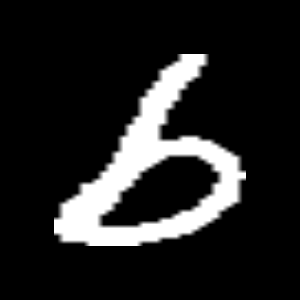

In [66]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

# Membaca gambar dengan nama 'b_small.png' menggunakan OpenCV
img = cv2.imread('/content/drive/MyDrive/College/05 - Semester 5/ML/Quiz_2/b_small.png')

# Menampilkan gambar menggunakan cv2_imshow dari Google Colab
cv2_imshow(img)

In [67]:
# Check shape dari gambar
img.shape

(300, 300, 3)

In [68]:
# Mengonversi gambar ke skala abu-abu (grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Check shape dari gambar grayscale
gray_img.shape

(300, 300)

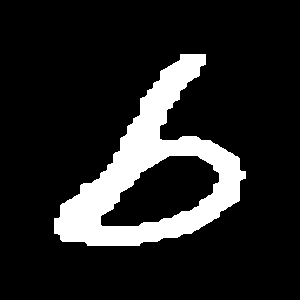

120.0


In [69]:
# Pre-process
# Binary Thresholding menggunakan metode Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil dari proses Binary Thresholding
cv2_imshow(thresh)

# Menampilkan nilai threshold yang dihitung oleh metode Otsu
print(value)

In [70]:
# Meresize gambar agar sesuai dengan ukuran input jaringan (28*28)
img_resize = cv2.resize(gray_img, (28,28))
# Menampilkan gambar yang sudah di-resize
cv2_imshow(img_resize)

In [71]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
# Mengonversi gambar menjadi float32 dan melakukan normalisasi
img_input = img_resize.astype('float32') / 255 # also perform normalization
# Menambahkan dimensi ke gambar agar sesuai dengan input jaringan (28*28*1)
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# Check shape dari gambar yang akan digunakan sebagai input jaringan
img_input.shape

(28, 28, 1)

In [72]:
# Menambahkan dimensi "jumlah data" sebagai batch untuk input jaringan
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [73]:
# Melakukan prediksi menggunakan model jaringan yang telah dimuat sebelumnya
prediction = load_network.predict(img_input)
# Mendapatkan label prediksi dari hasil prediksi
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 168ms/step


6

In [74]:
# Mengecek label untuk angka 6
name_labels[6]

'6'

# Kesimpulan

1. Kinerja Model CNN: Model yang dikembangkan mampu dengan baik dalam mengenali karakter huruf dan angka. Hasil evaluasi pada data uji menunjukkan tingkat akurasi yang tinggi, menandakan kemampuan model dalam menggeneralisasi pada data yang tidak terlibat dalam pelatihan.

2. Evaluasi Performa Model: Performa model dievaluasi menggunakan berbagai metrik seperti precision, recall, dan f1-score. Hasil evaluasi menunjukkan kinerja yang memuaskan dan konsisten, menegaskan kemampuan model dalam mengenali karakter dengan tepat dan komprehensif.

3. Penggunaan Teknik Augmentasi Data: Penerapan teknik augmentasi data, seperti rotasi, pergeseran, dan zoom, memberikan kontribusi signifikan terhadap peningkatan kualitas model. Dengan memperkenalkan variasi pada dataset, model dapat mengenali karakter dalam situasi yang lebih beragam.

4. Penanganan Ketidakseimbangan Kelas: Strategi untuk menangani ketidakseimbangan jumlah sampel antar kelas juga memberikan dampak positif. Dengan memberikan penekanan lebih pada kelas yang kurang representatif, model mampu belajar dengan lebih baik dari kelas yang memiliki sampel yang lebih sedikit.

5. Kemampuan untuk Disimpan dan Dimuat Ulang: Model yang telah dilatih dapat disimpan dan dimuat ulang dengan mudah untuk penggunaan di masa mendatang. Kemampuan ini memungkinkan model untuk diterapkan pada berbagai aplikasi pengenalan karakter, seperti dalam pengenalan plat nomor kendaraan, pengenalan tulisan tangan, dan skenario lain yang memerlukan pengenalan karakter dalam citra atau gambar.